In [1]:
# Case Nokia: Kuinka ennustaa osakkeen kurssikehitys Facebook Prophetilla? 
# Aineistona oli Nokian päätöskurssi (USD) 1.1.2015-31.3.2021 välisenä aikana. 

# Inspirointilähteenä: https://medium.com/swlh/using-prophet-in-stock-market-e79238c38c8e
# Inspirointilähteenä: https://github.com/Dhakal29/FBProphet/blob/main/FBProphet_in_time_series.ipynb

import pandas as pd
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
data = pd.read_csv("Nokia 2015 2021.csv") 
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1567,2021-03-25,3.92,4.00,3.90,3.97,3.97,37997300
1568,2021-03-26,4.02,4.09,3.97,4.06,4.06,34493300
1569,2021-03-29,4.04,4.08,4.00,4.02,4.02,26233600
1570,2021-03-30,3.99,4.00,3.91,3.99,3.99,29751400
1571,2021-03-31,3.97,4.00,3.96,3.96,3.96,18601200


In [2]:
# Kuvataan perustunnusluvut: keskiarvo, mediaani, minimi, maksimi ja keskihajonta arvot.
# Viimeisten viiden vuoden aikana 2015-2020 osakkeen päätöskurssin keskiarvo 
# on ollut 5,47 USD, maksimi 8,3 USD ja minimi 2,42 USD. 

data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1.572000e+03
mean,5.468117,5.519179,5.415789,5.465967,5.100734,2.231778e+07
std,1.141080,1.148878,1.138155,1.144098,0.871050,3.949499e+07
min,2.380000,2.540000,2.340000,2.420000,2.420000,1.425600e+06
25%,4.747500,4.780000,4.680000,4.730000,4.430250,1.044585e+07
50%,5.530000,5.570000,5.470000,5.520000,5.177884,1.595260e+07
75%,6.150000,6.190000,6.100000,6.150000,5.778088,2.458132e+07
max,8.180000,9.790000,8.040000,8.300000,7.011393,1.123003e+09


In [3]:
# tuodaan kirjastot

import fbprophet
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


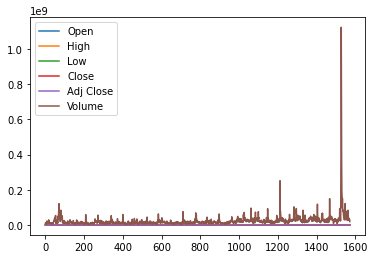

In [4]:
# tuodaan kirjastot

import matplotlib.pyplot as plt
data.plot()
plt.show()

In [5]:
# sarakkeet kuntoon

data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

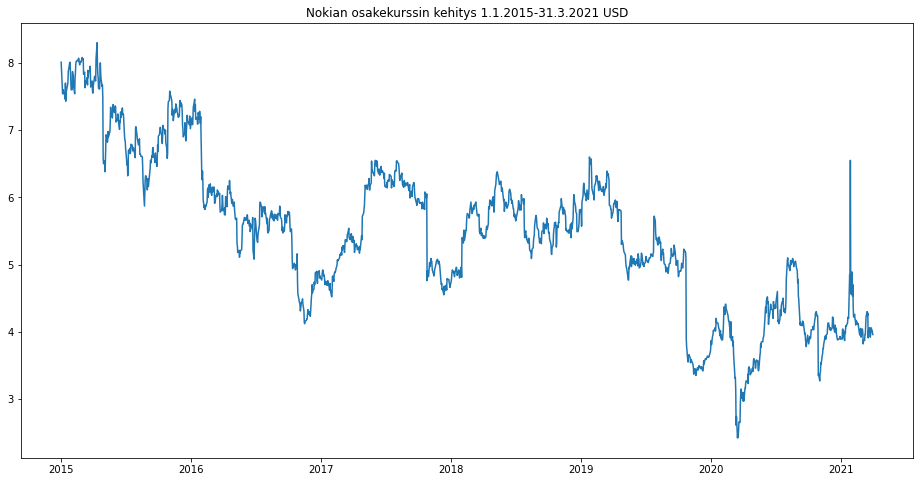

In [6]:
# Viimeisen vuodan kehityksen osalta huomaan, että kurssikehitys kääntyi jyrkkään laskuun koronapandemian puhkeamisen takia 
# maaliskuussa 200 ja kääntyi jyrkkään nousuun sosiaalisen median keskustelujen myötä tammikuussa 2021. 

data["Date"] = pd.to_datetime(data.Date, format="%Y-%m-%d")
data.index=data['Date']
plt.figure(figsize=(16,8))
plt.title("Nokian osakekurssin kehitys 1.1.2015-31.3.2021 USD")
plt.plot(data['Close'],label='Close')

In [7]:
# valitaan sarakkeet

data_to_use = data.filter(['Date','Close'])

In [8]:
# data valmiiksi

data_to_use

,Date,Close
Date,,
2015-01-02,2015-01-02,8.01
2015-01-05,2015-01-05,7.66
2015-01-06,2015-01-06,7.54
2015-01-07,2015-01-07,7.56
2015-01-08,2015-01-08,7.60
...,...,...
2021-03-25,2021-03-25,3.97
2021-03-26,2021-03-26,4.06
2021-03-29,2021-03-29,4.02


In [9]:
# ds pvm ja y päätöskurssi

data_to_use.columns = ['ds','y']

In [10]:
# päivämäärä kuntoon

data_to_use['ds'] = pd.to_datetime(data_to_use['ds'])

In [11]:
data_to_use.columns

Index(['ds', 'y'], dtype='object')

In [12]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [13]:
# mallin sovittaminen

model = Prophet()

In [14]:
# mallin sovittaminen

model.fit(data_to_use)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
# mallin sovittaminen

model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [16]:
# mallin sovittaminen

data_to_use=data_to_use.sort_values('ds',axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')

In [17]:
# Ennustus 100 päivälle

future_dates = model.make_future_dataframe(periods=100)

In [18]:
# Ennustus 100 päivälle

future_dates.tail()

,ds
1667,2021-07-05
1668,2021-07-06
1669,2021-07-07
1670,2021-07-08
1671,2021-07-09


In [19]:
# Ennustus 100 päivälle

prediction = model.predict(future_dates)

In [20]:
# Ennustus 100 päivälle

prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1667,2021-07-05,4.343184,3.848118,4.935611,4.213541,4.473656,0.066598,0.066598,0.066598,0.005429,0.005429,0.005429,0.061169,0.061169,0.061169,0.0,0.0,0.0,4.409782
1668,2021-07-06,4.344115,3.851166,4.937388,4.212346,4.476628,0.062250,0.062250,0.062250,-0.000458,-0.000458,-0.000458,0.062708,0.062708,0.062708,0.0,0.0,0.0,4.406365
1669,2021-07-07,4.345045,3.880505,5.007078,4.210006,4.479695,0.076541,0.076541,0.076541,0.010955,0.010955,0.010955,0.065586,0.065586,0.065586,0.0,0.0,0.0,4.421586
1670,2021-07-08,4.345976,3.850420,4.956227,4.208790,4.482648,0.061353,0.061353,0.061353,-0.008446,-0.008446,-0.008446,0.069799,0.069799,0.069799,0.0,0.0,0.0,4.407329
1671,2021-07-09,4.346906,3.904998,4.952685,4.206923,4.487249,0.071858,0.071858,0.071858,-0.003469,-0.003469,-0.003469,0.075327,0.075327,0.075327,0.0,0.0,0.0,4.418764


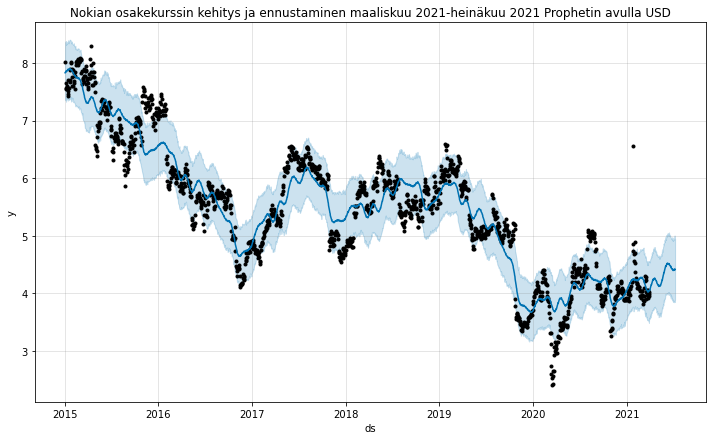

In [21]:
# Malli ennustaa tulevat arvo ja visualisoi ennusteet 100 seuraavalle päivälle
# Malli käyttää kaikkea dataa oppimiseen (mustat pisteet) ja ennustaa tulevan osakkeen kehityksen maaliskuusta 2020 - 
# kesäkuuhun 2021
# Sininen varjostus on luotettavuusraja.
# Johtopäätös: näyttä siltä, että Nokian kurssikehitys on noin 4,5 USD heinäkuussa 2021 mallin ennustuksen mukaan.
# Valitettavasti ei voida mitata mallin virheherkkyyttä. Jos sen haluaa tehdä, dataset pitää jakaa kahteen osaan
# traindataan ja testdataan ja ennustaa päätöskurssi testidatassa ja mitata virheherkkyys vasten testidatan päätöskurssia.
# Havainto: Osakkeen kurssi laski maaliskuussa 2020 COVID-19 viruspandemian puhjettua ja laajojen rajoitustoimien käynnistyttyä.

model.plot(prediction)
plt.title("Nokian osakekurssin kehitys ja ennustaminen maaliskuu 2021-heinäkuu 2021 Prophetin avulla USD")
plt.show()

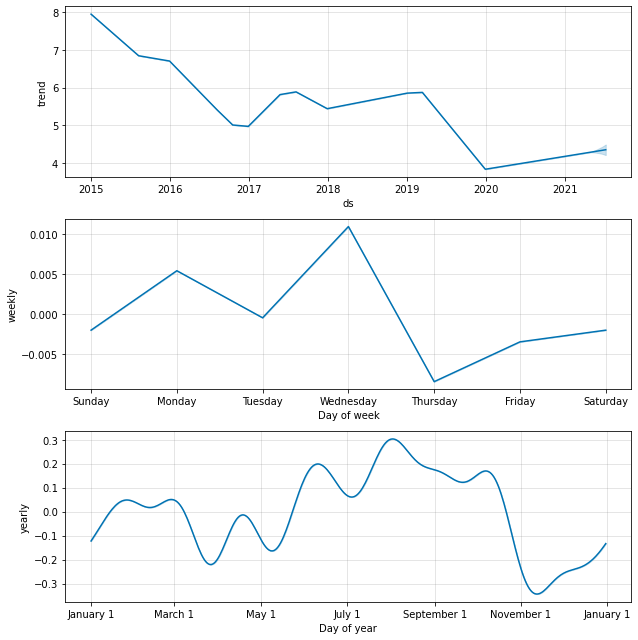

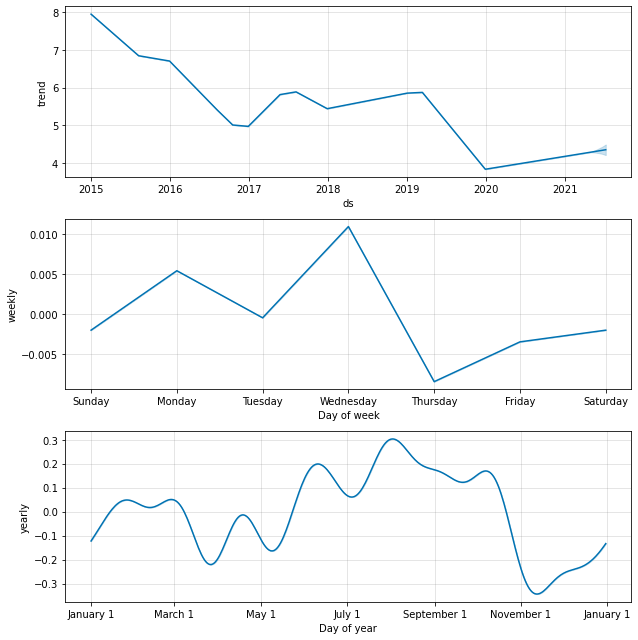

In [22]:
# Plotataan trendi, viikottainen, kausittainen, vuosittainen ja päivittäiset komponentit
# Tulokset
# Trendin perusteella nähdään, että osakekurssi yleensä nousee maksimitasolleen elokuun alussa
# ja keskiviikkoisin. Lopuksi nähdään kurssikehitys tulevaisuudessa luotettavuusrajoineen.

model.plot_components(prediction)

In [23]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='30 days', period='18 days', horizon = '65 days')
df_cv.head()

INFO:fbprophet:Making 122 forecasts with cutoffs between 2015-02-08 00:00:00 and 2021-01-25 00:00:00


  0%|          | 0/122 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-02-09,7.840774,7.733550,7.943682,7.54,2015-02-08
1,2015-02-10,7.755138,7.650916,7.857616,7.77,2015-02-08
2,2015-02-11,7.521687,7.418721,7.621580,7.84,2015-02-08
3,2015-02-12,7.091416,6.987433,7.193597,7.97,2015-02-08
4,2015-02-13,6.399018,6.297468,6.499516,8.02,2015-02-08


In [24]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,7 days,0.851219,0.922615,0.549131,0.100021,0.062810,0.474855
1,8 days,1.103710,1.050576,0.604239,0.107544,0.065914,0.458003
2,9 days,2.313886,1.521146,0.717783,0.124932,0.070560,0.437254
3,10 days,4.343561,2.084121,0.867332,0.146848,0.075882,0.423077
4,11 days,6.986188,2.643140,1.025192,0.168687,0.082903,0.409341


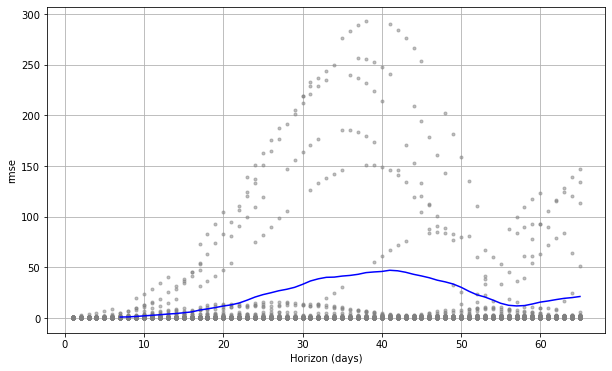

In [25]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [26]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,7 days,0.851219,0.922615,0.549131,0.100021,0.062810,0.474855
1,8 days,1.103710,1.050576,0.604239,0.107544,0.065914,0.458003
2,9 days,2.313886,1.521146,0.717783,0.124932,0.070560,0.437254
3,10 days,4.343561,2.084121,0.867332,0.146848,0.075882,0.423077
4,11 days,6.986188,2.643140,1.025192,0.168687,0.082903,0.409341
5,12 days,10.177298,3.190188,1.175541,0.189321,0.086876,0.397959
6,13 days,15.004595,3.873576,1.345860,0.214778,0.089893,0.391539
7,14 days,19.283317,4.391277,1.518042,0.240169,0.095669,0.384012
8,15 days,26.418904,5.139932,1.715750,0.267442,0.093077,0.378582
9,16 days,35.692753,5.974341,1.895554,0.292570,0.098870,0.362284
